In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from luwiji.recommendation_system import illustration

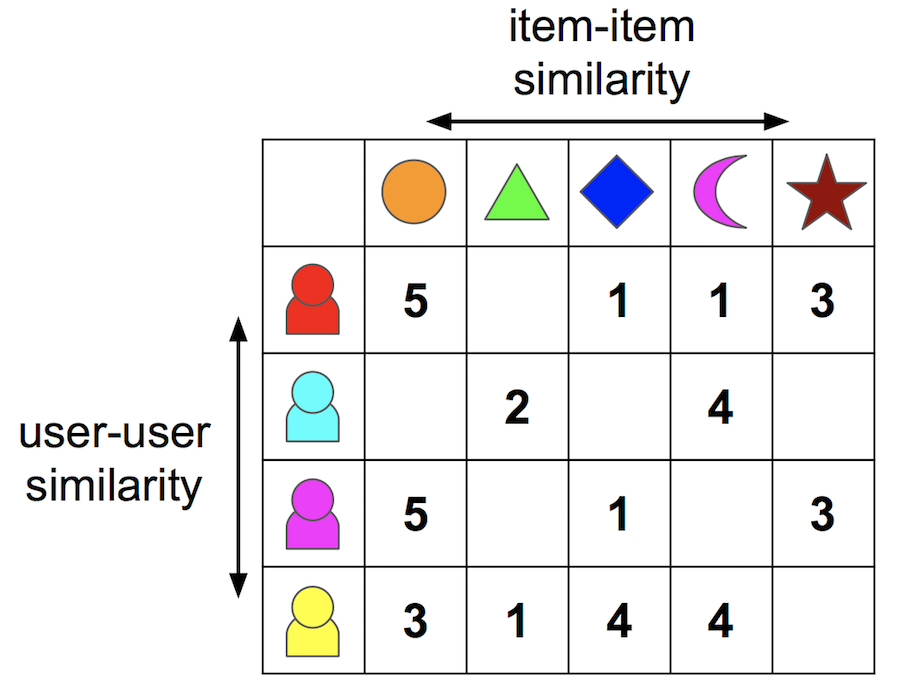

In [2]:
illustration.collaborative

# Import user rating

In [3]:
df = pd.read_csv('data/collaborative_filtering.csv')
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


In [4]:
df.tail()

,userId,movie,rating
1000204,6040,Weekend at Bernie's (1989),1
1000205,6040,"Crying Game, The (1992)",5
1000206,6040,Welcome to the Dollhouse (1995),5
1000207,6040,Sophie's Choice (1982),4
1000208,6040,E.T. the Extra-Terrestrial (1982),4


In [5]:
1000208 / df.userId.nunique()

165.5973509933775

# Training

In [11]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()
trainset


In [12]:
model = SVD()
model.fit(trainset)

In [13]:
model.predict(1, 'My Fair Lady (1964)')

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.178925445798357, details={'was_impossible': False})

# Prediksi rating untuk Film yang belum ditonton

In [15]:
user_id = 1

## semua film

In [14]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

## yang sudah ditonton user 1

In [16]:
watched = df[df.userId == 1].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

## yang belum ditonton

In [18]:
not_watched = [movie for movie in all_movies if movie not in watched]
not_watched

["One Flew Over the Cuckoo's Nest (1975)",
 'James and the Giant Peach (1996)',
 'My Fair Lady (1964)',
 'Erin Brockovich (2000)',
 "Bug's Life, A (1998)",
 'Princess Bride, The (1987)',
 'Ben-Hur (1959)',
 'Christmas Story, A (1983)',
 'Snow White and the Seven Dwarfs (1937)',
 'Wizard of Oz, The (1939)',
 'Beauty and the Beast (1991)',
 'Gigi (1958)',
 'Miracle on 34th Street (1947)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'Airplane! (1980)',
 'Tarzan (1999)',
 'Bambi (1942)',
 'Awakenings (1990)',
 'Big (1988)',
 'Pleasantville (1998)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Back to the Future (1985)',
 "Schindler's List (1993)",
 'Meet Joe Black (1998)',
 'Pocahontas (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Titanic (1997)',
 'Ponette (1996)',
 'Close Shave, A (1995)',
 'Antz (1998)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Aladdin (1992)',
 'Mulan (1998)',
 'Hunchback of Notre Dame, The (1996)',
 'Last Days of Di

## Prediksi rating untuk film yang belum ditonton

In [20]:
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.71022849532048,
 3.375702022208914,
 4.178925445798357,
 4.358222483973105,
 4.1835140686651595,
 3.980491014487602,
 4.499137889823189,
 4.2332736168766765,
 4.014112524511096,
 4.485660722122008,
 4.604381585505171,
 3.781337699329865,
 4.099772377674536,
 4.124759109480018,
 4.588267501591913,
 4.102649593561955,
 3.8353036409748507,
 3.932637675898735,
 4.197205031886657,
 4.147747496380949,
 3.825030884291326,
 4.14391946430198,
 4.43918782945411,
 5,
 3.893328432953601,
 3.915741422273375,
 4.276091005833874,
 4.173075839468206,
 4.184465864297199,
 4.357981935166137,
 3.612897157115418,
 3.6640190184667993,
 3.9005688539092302,
 4.400461826810044,
 4.373615249225051,
 3.7724936777535483,
 3.9237566273182805,
 4.146709883651756,
 4.517530053511629,
 4.608165254996756,
 4.591177395888331,
 4.3858147220088695,
 3.9955192835013573,
 4.20844837850225,
 4.22208504928847,
 4.417470590340415,
 4.128704237994674,
 4.629731966353433,
 4.501473083301279,
 3.9647261261831845,
 4.47159410

# ML Engineering: sum them all up

In [21]:
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.all_movies = self.df.movie.unique()
        self.model = None

    def fit(self):
        data = Dataset.load_from_df(self.df, Reader())
        trainset = data.build_full_trainset()

        self.model = SVD()
        self.model.fit(trainset)

    def recommend(self, user_id, topk=10):
        watched = self.df[self.df.userId == user_id].movie
        not_watched = [movie for movie in self.all_movies if movie not in watched]
        score = [self.model.predict(user_id, movie).est for movie in not_watched]

        result = pd.DataFrame({"movie": not_watched, "pred_score": score})
        result.sort_values("pred_score", ascending=False, inplace=True)
        return result.head(topk)

In [22]:
recsys = RecommenderSystem('data/collaborative_filtering.csv')
recsys.fit()

In [23]:
recsys.recommend(user_id=1)

,movie,pred_score
669,"Godfather, The (1972)",5.000000
67,GoodFellas (1990),4.951189
167,"Shawshank Redemption, The (1994)",4.932601
128,"Silence of the Lambs, The (1991)",4.917425
839,"Great Escape, The (1963)",4.902063
209,Alien (1979),4.899552
48,Saving Private Ryan (1998),4.860098
434,"Godfather: Part II, The (1974)",4.848780
23,Schindler's List (1993),4.844684
68,Gladiator (2000),4.841936
